In [1]:
%pip install textblob


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
# import libraries
from textblob import TextBlob
import pandas as pd
import time
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score
)
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("../../../data/test_data.csv")  # Load test dataset

print(df.head())

        id                                               text  \
0  gg5ic5k  Thank you for sharing I have too many looming ...   
1  ghsx6oa  Alex Jones infowars.comSaid it will make you i...   
2  gidm2by  My dizziness this second time around hasn't be...   
3  gwe8ih0                       Yay!!! Thank you for sharing   
4  gr3f1r6  Thank you for your words! I hope I can get bet...   

               author                created_utc  No_of_comments  \
0        honeycombB82  2020-12-17 16:14:54+00:00             NaN   
1        StandupGamer  2021-01-02 05:52:26+00:00             NaN   
2              mjfx28  2021-01-07 02:13:41+00:00             NaN   
3            Rachet83  2021-04-30 06:18:38+00:00             NaN   
4  itsactuallynotokay  2021-03-16 05:35:11+00:00             NaN   

   Subjectivity  Polarity  Analysis   Parent    Link  
0      0.350000  0.237500  Positive   keq6mr  keq6mr  
1      0.000000  0.000000   Neutral   kof5pv  kof5pv  
2      0.411508 -0.252381  Negative

In [16]:
# Function to classify sentiment based on polarity score
def classify_textblob_sentiment(text):
    if not isinstance(text, str):
        return 'Neutral'  # Handle NaN or non-string gracefully
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'


In [17]:
# Start timing inference
start = time.time()

# Apply TextBlob sentiment classification
df['predicted_sentiment'] = df['text'].apply(classify_textblob_sentiment)

# End timing inference
end = time.time()
inference_time = end - start

# Save inference time to CSV
time_df = pd.DataFrame({"TextBlob_InferenceTime (s)": [inference_time]})
time_df.to_csv("computation_time_textblob.csv", index=False)

print("Inference time: ", inference_time, "seconds")
print("Inference time is saved")

Inference time:  0.5854413509368896 seconds
Inference time is saved


Save result to CSV

In [6]:
# Save only desired columns to CSV
result_df = df[["id", "text", "predicted_sentiment"]]
result_df.to_csv("textblob_sentiment_output.csv", index=False)

print("Sentiment analysis complete. Output saved to 'textblob_sentiment_output.csv'.")
print("Output length:", len(result_df))

Sentiment analysis complete. Output saved to 'textblob_sentiment_output.csv'.
Output length: 1938


Evaluation

In [ ]:
# Evaluation — Compare predicted_sentiment with true labels in 'Analysis' column
y_true = df["Analysis"]  # Ground truth labels
y_pred = df["predicted_sentiment"]  # Predicted by TextBlob

Classification Report

In [8]:
# Generate classification report
report = classification_report(y_true, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

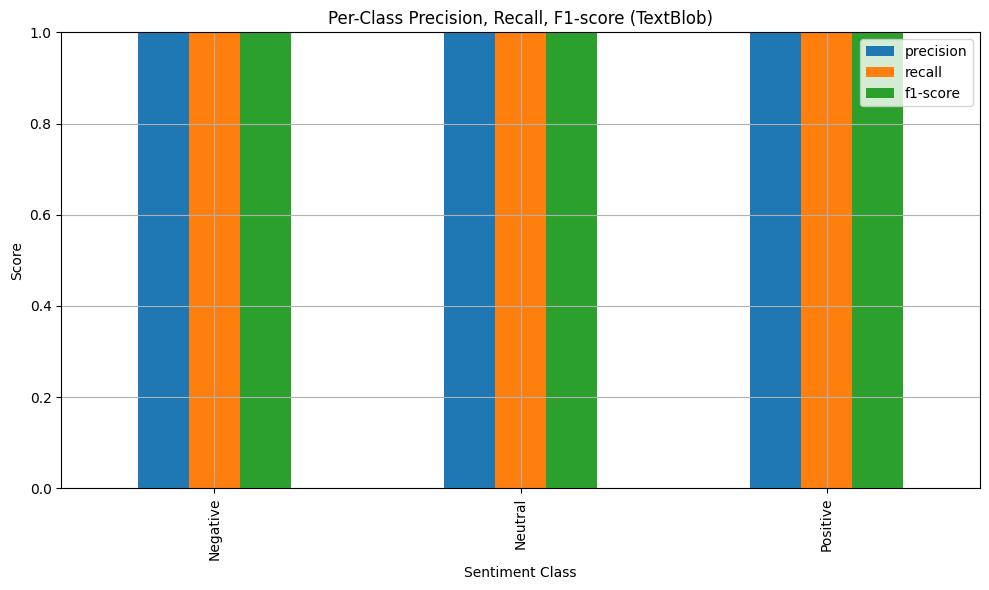

In [9]:
# Plot per-class Precision, Recall, F1-score
report_df.drop(['accuracy', 'macro avg', 'weighted avg'], inplace=True)
report_df[['precision', 'recall', 'f1-score']].plot.bar(figsize=(10,6))

# Save classification report to CSV
report_df[['precision', 'recall', 'f1-score']].to_csv("classification_report_textblob.csv")

# Plot customization and save
plt.title("Per-Class Precision, Recall, F1-score (TextBlob)")
plt.ylabel("Score")
plt.xlabel("Sentiment Class")
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.savefig("classification_report_textblob.png")
plt.show()

Confusion Matrix

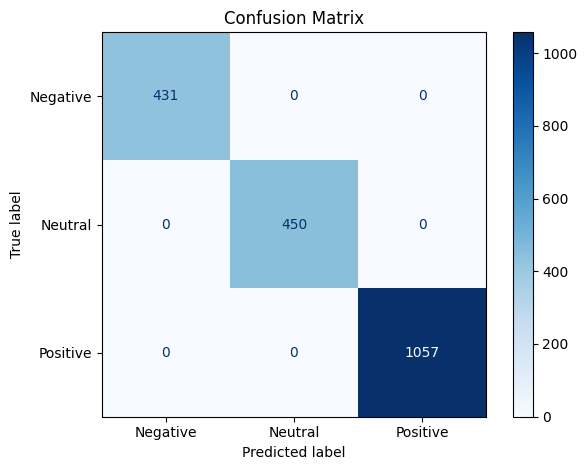

In [10]:
cm = confusion_matrix(y_true, y_pred, labels=report_df.index)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=report_df.index)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig("confusion_matrix_textblob.png") # Save confusion matrix plot
plt.show()

Accuracy

In [11]:
acc = accuracy_score(y_true, y_pred)
rounded_acc = round(acc, 4) # Round accuracy to 4 decimal places
print("Overall Accuracy:", rounded_acc)

accuracy_df = pd.DataFrame([{"Metric": "Overall Accuracy", "Score": rounded_acc}])
accuracy_df.to_csv("overall_accuracy_textblob.csv", index=False) # Save overall accuracy to CSV


Overall Accuracy: 1.0
